<a href="https://colab.research.google.com/github/Akhila731/Hello-world/blob/master/Decision_Tree_RF_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree Classification Model

We will use the built in Pima Indians Diabetes dataset. It is available as part of the SKlearn datasets. We have made it easily available for you.

In [ ]:
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/pima-indians-diabetes.csv", header=None, names=col_names)

In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima.shape

(768, 9)

In [ ]:
pima['label'].value_counts()

0    500
1    268
Name: label, dtype: int64

In [ ]:
pima.corr()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
label,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
len(X_train)

537

In [ ]:
len(X_test)

231

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
predictions = clf.predict(X_test)
predicted_probas = clf.predict_proba(X_test)

In [ ]:
clf.get_depth()

5

In [ ]:
clf.get_n_leaves()

27

In [ ]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, predictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.81      0.84      0.83       146
           1       0.71      0.66      0.68        85

    accuracy                           0.77       231
   macro avg       0.76      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
Accuracy:  0.7748917748917749


In [ ]:
!pip install scikit-plot

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


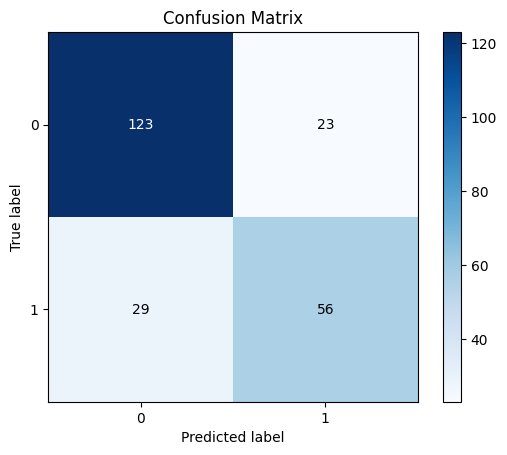

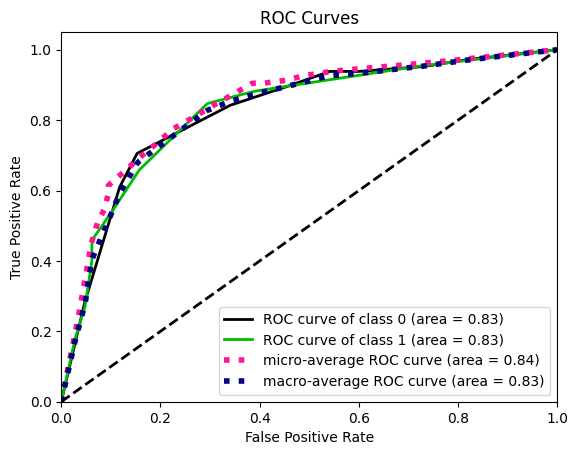

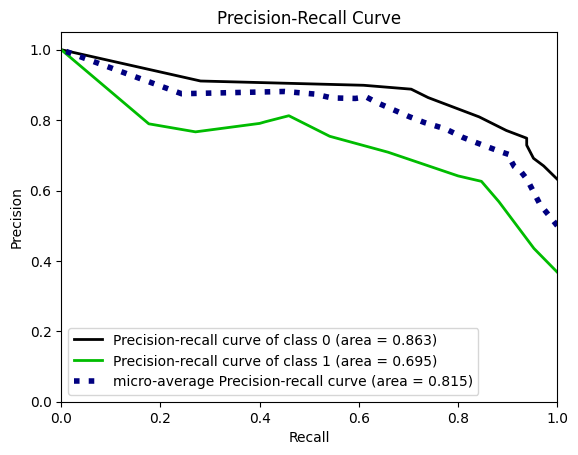

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt


skplt.metrics.plot_confusion_matrix(y_test, predictions)
skplt.metrics.plot_roc(y_test, predicted_probas)
skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
plt.show()

In [ ]:
clf.feature_importances_

array([0.06410163, 0.        , 0.22955245, 0.16011341, 0.42456186,
       0.02450952, 0.09716112])

In [ ]:
!pip install graphviz

In [ ]:
X.columns

Index(['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')

In [ ]:
classes = y.unique()

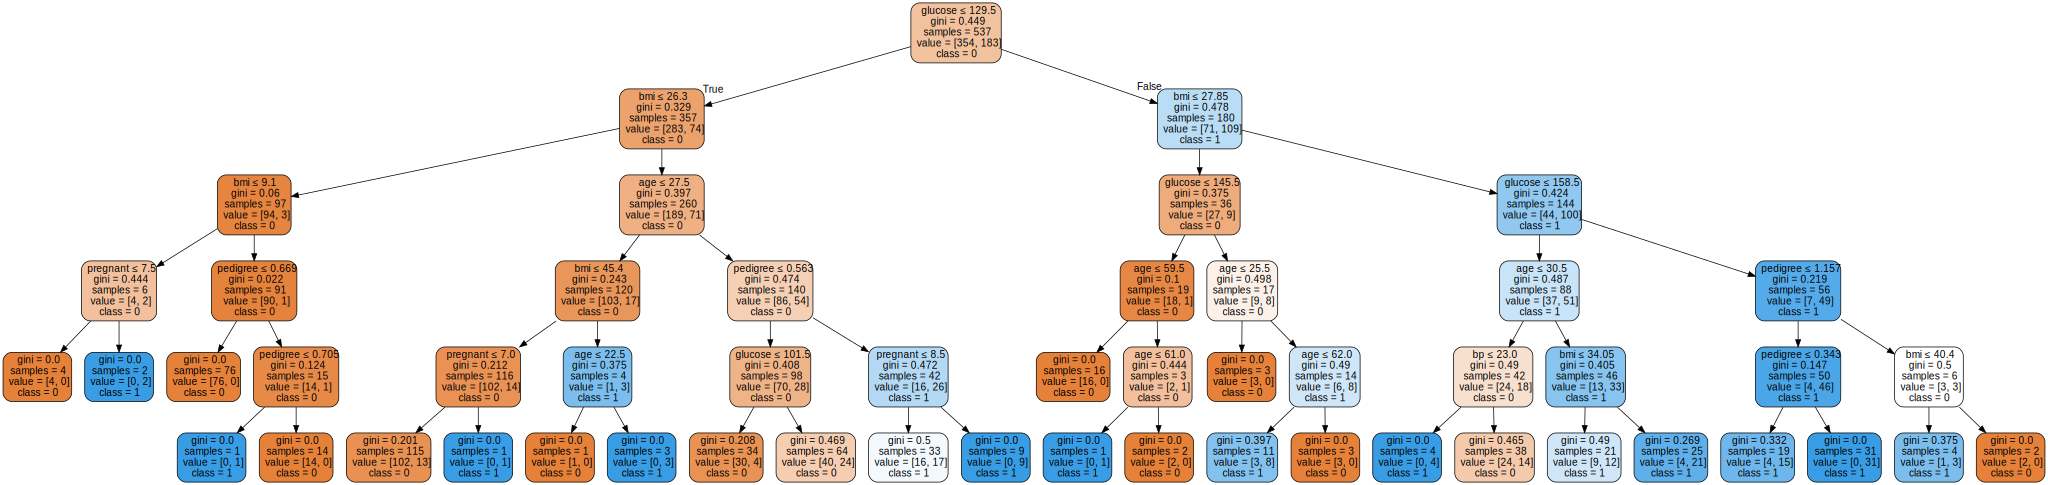

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names = feature_cols,class_names=['0','1'],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Excercise 1

Construct the following models on the same dataset as above:
- Bagging
- Random Forest
- Adaboost

Compare their performance and write a short paragraph on which one is the best. You are free to change the hyperparameters.


In [ ]:
from sklearn.ensemble import BaggingClassifier
# Create Bagging classifer object
bg = BaggingClassifier(n_estimators=120)

# Train Decision Tree Classifer
bg = bg.fit(X_train,y_train)

#Predict the response for test dataset
predictions = bg.predict(X_test)
predicted_probas = bg.predict_proba(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, predictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.80      0.86      0.83       146
           1       0.73      0.62      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0
 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]
Accuracy:  0.7748917748917749


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create Bagging classifer object
rf = RandomForestClassifier(n_estimators=120)

# Train Decision Tree Classifer
rf = rf.fit(X_train,y_train)

#Predict the response for test dataset
predictions = rf.predict(X_test)
predicted_probas = rf.predict_proba(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, predictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.80      0.91      0.85       146
           1       0.80      0.61      0.69        85

    accuracy                           0.80       231
   macro avg       0.80      0.76      0.77       231
weighted avg       0.80      0.80      0.79       231

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]
Accuracy:  0.8008658008658008


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Create Bagging classifer object
ab = AdaBoostClassifier(n_estimators=120)

# Train Decision Tree Classifer
ab = ab.fit(X_train,y_train)

#Predict the response for test dataset
predictions = ab.predict(X_test)
predicted_probas = ab.predict_proba(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, predictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.82      0.88      0.85       146
           1       0.76      0.67      0.71        85

    accuracy                           0.80       231
   macro avg       0.79      0.77      0.78       231
weighted avg       0.80      0.80      0.80       231

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0
 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0
 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 1]
Accuracy:  0.8008658008658008


For this specific dataset, I've found that both Random Forest and AdaBoost perform well when I set the number of estimators (n_estimators) to 120. Through experimentation with various values of n_estimators, I've determined that increasing this number actually decreases the accuracy for this particular dataset.

### Application on Cuisines Dataset

In [ ]:
import pandas as pd
cuisines_df = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/cuisines.csv")
cuisines_df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
cuisines_df['cuisine'].value_counts()

indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: cuisine, dtype: int64

In [ ]:
cuisines_label_df = cuisines_df['cuisine']
cuisines_label_df.head()

0    indian
1    indian
2    indian
3    indian
4    indian
Name: cuisine, dtype: object

In [ ]:
cuisines_label_df.value_counts()

indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: cuisine, dtype: int64

In [ ]:
type(cuisines_label_df)

pandas.core.series.Series

In [ ]:
cuisine_labels_distinct = cuisines_label_df.unique()

In [ ]:
cuisine_labels_distinct

array(['indian', 'thai', 'chinese', 'japanese', 'korean'], dtype=object)

In [ ]:
cuisines_feature_df = cuisines_df.drop(['Unnamed: 0', 'cuisine'], axis=1)
cuisines_feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)

[Text(0.5426136363636364, 0.9166666666666666, 'x[112] <= 0.5\ngini = 0.8\nsamples = 2796\nvalue = [565, 557, 571, 555, 548]'),
 Text(0.32954545454545453, 0.75, 'x[290] <= 0.5\ngini = 0.784\nsamples = 2312\nvalue = [562, 230, 566, 553, 401]'),
 Text(0.18181818181818182, 0.5833333333333334, 'x[334] <= 0.5\ngini = 0.783\nsamples = 2143\nvalue = [559, 230, 563, 392, 399]'),
 Text(0.09090909090909091, 0.4166666666666667, 'x[185] <= 0.5\ngini = 0.786\nsamples = 1916\nvalue = [383, 230, 550, 368, 385]'),
 Text(0.045454545454545456, 0.25, 'x[68] <= 0.5\ngini = 0.781\nsamples = 1783\nvalue = [379, 221, 540, 368, 275]'),
 Text(0.022727272727272728, 0.08333333333333333, 'gini = 0.75\nsamples = 1363\nvalue = [314, 145, 521, 196, 187]'),
 Text(0.06818181818181818, 0.08333333333333333, 'gini = 0.73\nsamples = 420\nvalue = [65, 76, 19, 172, 88]'),
 Text(0.13636363636363635, 0.25, 'x[129] <= 0.5\ngini = 0.305\nsamples = 133\nvalue = [4, 9, 10, 0, 110]'),
 Text(0.11363636363636363, 0.08333333333333333,

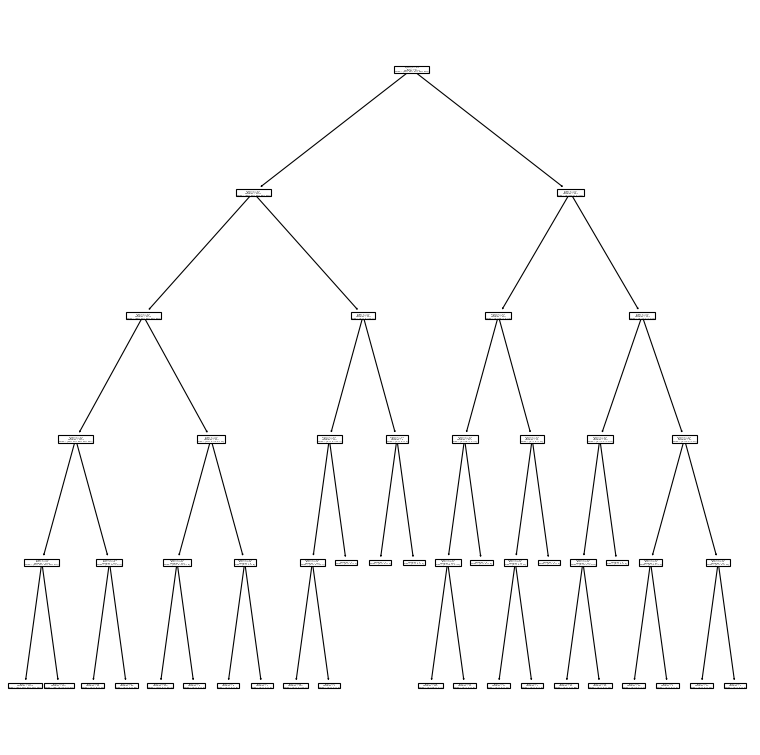

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(12, 12), dpi=80)
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)

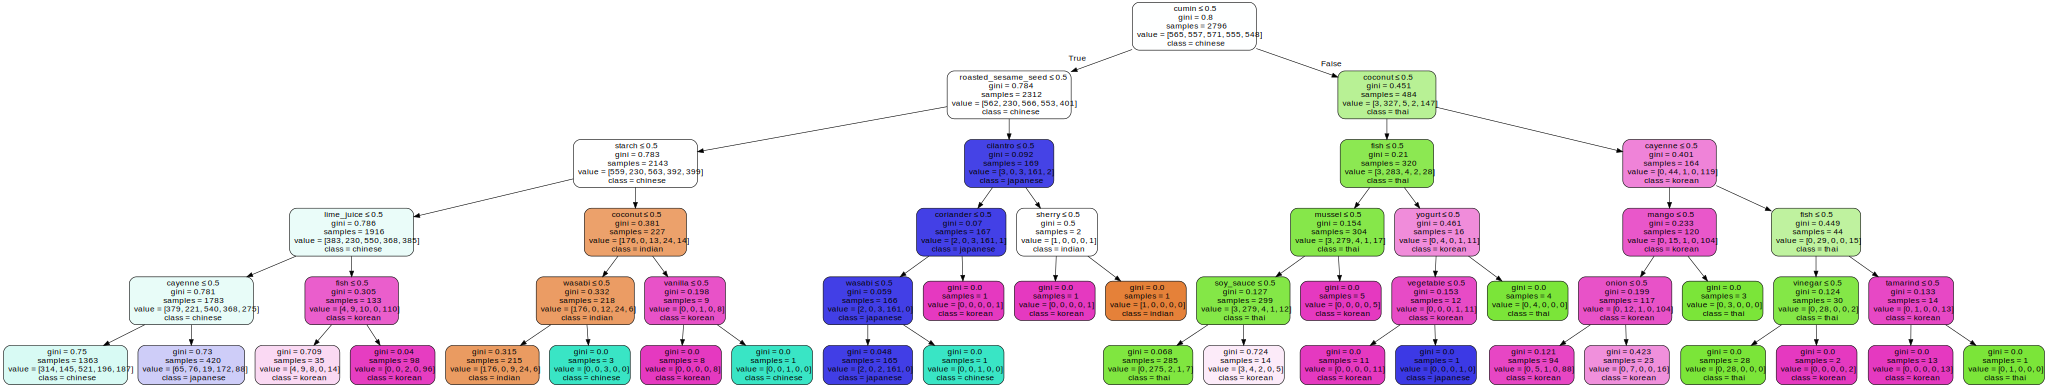

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=cuisines_feature_df.columns,
                     class_names=cuisine_labels_distinct,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.68      0.26      0.38       234
      indian       0.90      0.55      0.68       242
    japanese       0.36      0.89      0.51       228
      korean       0.58      0.58      0.58       244
        thai       0.80      0.46      0.58       251

    accuracy                           0.55      1199
   macro avg       0.66      0.55      0.55      1199
weighted avg       0.67      0.55      0.55      1199



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


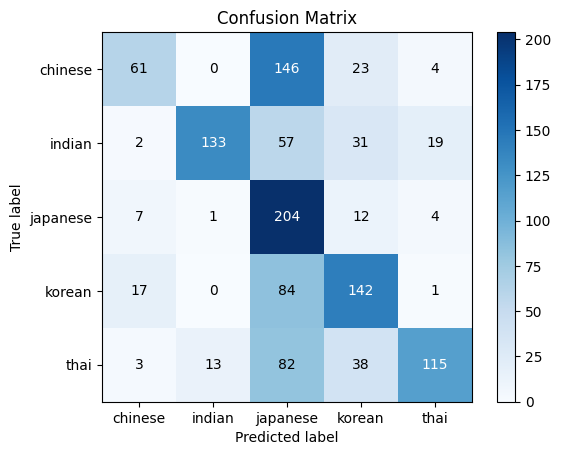

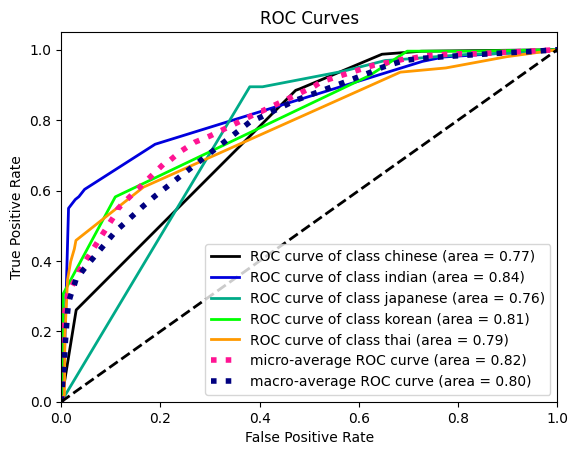

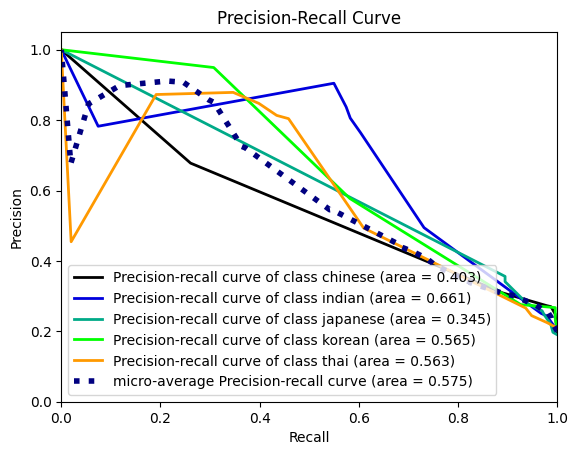

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
skplt.metrics.plot_roc(y_test, y_probs)
skplt.metrics.plot_precision_recall_curve(y_test, y_probs)
plt.show()

Exercise 2
The accuracy for the above dataset is quite low. Can you try any other method that increases the accuracy. You can try either Random Forest or Adaboost. What do you notice?

When applied Random Forest and AdaBoost to this dataset, Random Forest exhibited superior performance. The accuracy significantly improved from 0.55 to 0.82, indicating that Random Forest outperformed AdaBoost in this specific scenario.

In [ ]:
rf = RandomForestClassifier( random_state=0, n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.75      0.74      0.75       234
      indian       0.86      0.92      0.89       242
    japanese       0.82      0.79      0.81       228
      korean       0.87      0.77      0.82       244
        thai       0.81      0.87      0.84       251

    accuracy                           0.82      1199
   macro avg       0.82      0.82      0.82      1199
weighted avg       0.82      0.82      0.82      1199



In [ ]:
ab = AdaBoostClassifier(random_state=0, n_estimators = 100)
ab.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
y_pred = ab.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.65      0.52      0.58       234
      indian       0.85      0.83      0.84       242
    japanese       0.68      0.56      0.61       228
      korean       0.68      0.79      0.73       244
        thai       0.66      0.80      0.73       251

    accuracy                           0.70      1199
   macro avg       0.70      0.70      0.70      1199
weighted avg       0.70      0.70      0.70      1199



# Parameter Grid Builder for Parameter Tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

dt_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('dt', DecisionTreeClassifier())])
params = [{'dt__max_depth': [3, 5, 7, 9],
         'dt__min_samples_leaf': [2, 3, 5]}]

gs_dt = GridSearchCV(dt_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_dt.fit(cuisines_feature_df, cuisines_label_df)
print(gs_dt.best_params_)
# find best model score
print(gs_dt.score(cuisines_feature_df, cuisines_label_df))


{'dt__max_depth': 9, 'dt__min_samples_leaf': 3}
0.6475594493116396


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

rf = RandomForestClassifier()

params = {'max_depth': [5, 7, 9,20],
          'n_estimators': [50, 100, 200],
          'max_features': ['sqrt', 'log2']
          }

grid = GridSearchCV(rf, params, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(cuisines_feature_df, cuisines_label_df)

print(grid.best_params_)
# find best model score
print(grid.score(cuisines_feature_df, cuisines_label_df))

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
0.906883604505632


In [ ]:
ab = AdaBoostClassifier()

params = {'algorithm': ['SAMME', 'SAMME.R'],
          'n_estimators': [50, 100,120,140, 200],

          }

grid = GridSearchCV(ab, params, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(cuisines_feature_df, cuisines_label_df)

print(grid.best_params_)
# find best model score
print(grid.score(cuisines_feature_df, cuisines_label_df))

{'algorithm': 'SAMME.R', 'n_estimators': 100}
0.732665832290363


# Exercise 3

Try other combination of hyperparameters for Random Forest and AdaBoost models and check how good of an accuracy you can obtain.


I experimented with various combinations for both Random Forest and AdaBoost.

For Random Forest:

When I set the maximum depth to 20, used "sqrt" for the maximum features, and set the number of estimators (n_estimators) to 100, the accuracy improved to 90%.

For AdaBoost:

While working with AdaBoost, I explored different combinations of the algorithm and n_estimators parameters, and the best accuracy I achieved was 73%.